# Оглавление
1. [Изучение общей информации](#start)
2. Подготовка данных:
     - 2.1 [Замена названий столбцов](#2.1)
     - 2.2 [Замена типов данных](#2.2)
     - 2.3 [Обработка пропусков](#2.3)
     - 2.4 [Добавление столбца с суммарными продажами](#2.4)
3. Исследовательский анализ:
     - 3.1 [Количество игр, выпущенных в разное время](#3.1)
     - 3.2 [Изменение продаж по платформам. Срок "жизни" платформы](#3.2)
     - 3.3 [Выбор актуального периода](#3.3)
     - 3.4 [Лидеры продаж среди платформ](#3.4)
     - 3.5 ["Ящик с усами"](#3.5)
     - 3.6 [Влияние критики на продажи внутри одной платформы](#3.6)
     - 3.7 [Соотнести выводы с продажами игр на других платформах](#3.7)
     - 3.8 [Общее распределение игр по жанрам](#3.8)
4. Портрет пользователя каждого региона (NA, EU, JP):
     - 4.1 [ТОП-5 платформ](#4.1)
     - 4.2 [ТОП-5 жанров](#4.2)
     - 4.3 [Влияние рейтинга ESRB в отдельном регионе](#4.3)
5. Проверка гипотез:
     - 5.1 [Рейтинги Xbox ONE и PS4](#5.1)
     - 5.2 [Рейтинги жанров Action и Sports](#5.2)
6. [Общий вывод](#6)


[Вопросы ревьюверу от студента](#questions)

### 1. Изучение общей информации.<a id = "start"></a>

In [1]:
#1. ОТКРЫТЬ ФАЙЛ С ДАННЫМИ
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
#import math

games = pd.read_csv('/datasets/games.csv')
display(games)
games.info()


###НЕБОЛЬШОЕ ОТСТУПЛЕНИЕ, ПРОВЕРКА ДЛЯ САМОГО СЕБЯ
#P.S. добавка от 1 декабря 2020
'''
print('ПРОВЕРКА tbd В СТОЛБЦЕ')
print(games['User_Score'].value_counts())
'''



,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


"\nprint('ПРОВЕРКА tbd В СТОЛБЦЕ')\nprint(games['User_Score'].value_counts())\n"

### 2.1 Замена названий столбцов<a id = '2'></a>

In [2]:
#2 ПОДГОТОВИТЬ ДАННЫЕ
    #2.1 ЗАМЕНА НАЗВАНИЯ СТОЛБЦОВ, ПРИВЕДЕНИЕ К НИЖНЕМУ РЕГИСТРУ    
games.columns = games.columns.str.lower()

print('')
print('ПОСЛЕ ЗАМЕНЫ НАЗВАНИЯ СТОЛБЦОВ')
display(games)
games.info()


ПОСЛЕ ЗАМЕНЫ НАЗВАНИЯ СТОЛБЦОВ


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### 2.2 Замена типов данных<a id = '2.2'></a>

In [3]:
    #2.2 ЗАМЕНА ТИПОВ ДАННЫХ
    
print('ДО ЗАМЕНТЫ ТИПОВ ДАНЫХ')
display(games)
    #ИЗНАЧАЛЬНО У year_of_release значение float, что не совсем верно, т.к. значения в столбце все целые
games['year_of_release'] = games['year_of_release'].astype('Int64')
    #ИЗНАЧАЛЬНО У critic_score ЗНАЧЕНИЕ float, ЧТО НЕ СОВСЕМ ВЕРНО, Т.К. ЗНАЧЕНИЯ В СТОЛБЦЕ ВСЕ ЦЕЛЫЕ
games['critic_score'] = games['critic_score'].astype('Int64')

print('ПОСЛЕ ЗАМЕНТЫ ТИПОВ ДАНЫХ')
display(games)
games.info()

ДО ЗАМЕНТЫ ТИПОВ ДАНЫХ


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


ПОСЛЕ ЗАМЕНТЫ ТИПОВ ДАНЫХ


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null Int64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null Int64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: Int64(2), float64(4), object(5)
memory usage: 1.4+ MB


### 2.3 Обработка пропусков<a id = '2.3'></a>

In [4]:
    #2.3 ОБРАБОТКА ПРОПУСКОВ, ПЕРВЫМ ДЕЛОМ В СТОЛБЦЕ year_of_release
    #сколько пропусков в годах для определённых консолей
import numpy as np

#isnull
#display(games.groupby(['platform', 'name', 'year_of_release'])['year_of_release'].count())
a = games.groupby(['platform', 'name'])['year_of_release'].median().reset_index() 
a_1 = games.groupby(['platform', 'name'])['year_of_release'].median()
print(a_1.reset_index())
print('ДАТАСЕТ A')
print(a)
a.info()
print('')
print(a.groupby(['platform'])['year_of_release'].median())
print('')
print('ПРОБУЮ ОБОЙТИСЬ БЕЗ b')

print('')

b = a.groupby(['platform'])['year_of_release'].median()
print('ДАТАСЕТ B')
print(b)
print('')
print('ПРОВЕРКА')

    #ЗАМЕНА NaN ЗНАЧЕНИЙ В year_of_release МЕДИАННЫМ ЗНАЧЕНИЕМ ПО КОНСОЛИ  

print(a.isnull().sum())

    for i in range(len(a)):
        if np.isnan(a.loc[i ,'year_of_release']):
            a.loc[i, 'year_of_release'] = b[a.loc[i, 'platform']]

print(a)
print(a.isnull().sum())

print('')
print('ОБЪЕДИНЕНИЕ ТАБЛИЦ a И ПЕРВОНАЧАЛЬНОЙ games')
games = games.merge(a, on=('platform', 'name'), how='left', suffixes=('_befor', '_after'))
display(games)
games.info()
print('')
#data_subcategory_1
print(games.isnull().sum())
print('')
###ПРОДОЛЖЕНИЕ ВНИЗУ

    #2.3 УДАЛЕНИЕ NaN ЗНАЧЕНИЙ В СТОЛБЦАХ name и genre
print('УДАЛЕНИЕ NaN ЗНАЧЕНИЙ В СТОЛБЦАХ name И genre')
#name и genre удалить пустые значения
games.dropna(subset = ['name', 'genre'], inplace = True)
games = games.reset_index(drop = True)
print(games.isnull().sum())
#ОСТАЛИСЬ ПРОПУСКИ В year_of_release_before, НО ЭТО СТАРЫЙ СТОЛБЕЦ, 
#ОСТАВШИЙСЯ ПОСЛЕ ОБЪЕДИНЕНИЯ - year_of_release_after
    
#ОСТАЛИСЬ ПРОПУСКИ ЛИШЬ В critic_score, user_score И rating
#В СЛЕДУЮЩИХ ТРЁХ БОКСАХ БУДЕМ РАЗБИРАТЬ ДАННУЮ "ПРОБЛЕМУ"

      platform                        name  year_of_release
0         2600                Action Force           1982.0
1         2600                   Adventure              NaN
2         2600          Adventures of Tron           1981.0
3         2600                    Air Raid           1981.0
4         2600              Air-Sea Battle              NaN
...        ...                         ...              ...
16704     XOne                      XCOM 2           2016.0
16705     XOne                      ZombiU           2016.0
16706     XOne         Zombie Army Trilogy           2015.0
16707     XOne           Zoo Tycoon (2013)           2013.0
16708     XOne  Zumba Fitness: World Party           2013.0

[16709 rows x 3 columns]
ДАТАСЕТ A
      platform                        name  year_of_release
0         2600                Action Force           1982.0
1         2600                   Adventure              NaN
2         2600          Adventures of Tron           1981.0
3   

,name,platform,year_of_release_befor,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year_of_release_after
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8,E,2006.0
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,1985.0
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,2008.0
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8,E,2009.0
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,1996.0
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,2016.0
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,2006.0
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,2016.0
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,2003.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16715 entries, 0 to 16714
Data columns (total 12 columns):
name                     16713 non-null object
platform                 16715 non-null object
year_of_release_befor    16446 non-null Int64
genre                    16713 non-null object
na_sales                 16715 non-null float64
eu_sales                 16715 non-null float64
jp_sales                 16715 non-null float64
other_sales              16715 non-null float64
critic_score             8137 non-null Int64
user_score               10014 non-null object
rating                   9949 non-null object
year_of_release_after    16713 non-null float64
dtypes: Int64(2), float64(5), object(5)
memory usage: 1.7+ MB

name                        2
platform                    0
year_of_release_befor     269
genre                       2
na_sales                    0
eu_sales                    0
jp_sales                    0
other_sales                 0
critic_score           

NaN значения в столбце year_of_release были успешно заменены меданным. Сначала мы сгрупировали таблицу games по консолям и играм, после агрегировали медианное значение по платформе и заменили им пустые значения.

In [5]:
print('')
print('ПРОПУЩЕННЫЕ ЗНАЧЕНИЯ В СТОЛБЦАХ С РЕЙТИНГОМ')
print(games.isnull().sum())
print('')
print(games['critic_score'].value_counts())
print('')
print(games['user_score'].value_counts())
print('')
print(games['rating'].value_counts())
print('')


ПРОПУЩЕННЫЕ ЗНАЧЕНИЯ В СТОЛБЦАХ С РЕЙТИНГОМ
name                        0
platform                    0
year_of_release_befor     269
genre                       0
na_sales                    0
eu_sales                    0
jp_sales                    0
other_sales                 0
critic_score             8576
user_score               6699
rating                   6764
year_of_release_after       0
dtype: int64

70    256
71    254
75    245
78    240
73    238
     ... 
29      3
22      1
21      1
17      1
13      1
Name: critic_score, Length: 82, dtype: int64

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.9       2
1.3       2
0.6       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64



### 2.4 Добавление столбца с суммарными продажами по всем регионам<a id = '2.4'></a>

In [6]:
#2.4 ДОБАВЛЯЕМ СТОЛБЕЦ
'''
def sum_sales(row):
    na_sales = row['na_sales']
    eu_sales = row['eu_sales']
    jp_sales = row['jp_sales']
    other_sales = row['other_sales']
    charge = other_sales
    charge += (na_sales + eu_sales + jp_sales)
    return charge


games['sum_sales'] = games.apply(sum_sales, axis = 1)
display(games)
games.info()
'''
games['sum_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
display(games)
games.info()

,name,platform,year_of_release_befor,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year_of_release_after,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8,E,2006.0,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,1985.0,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,2008.0,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8,E,2009.0,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,1996.0,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16708,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,2016.0,0.01
16709,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,2006.0,0.01
16710,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,2016.0,0.01
16711,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,2003.0,0.01


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 13 columns):
name                     16713 non-null object
platform                 16713 non-null object
year_of_release_befor    16444 non-null Int64
genre                    16713 non-null object
na_sales                 16713 non-null float64
eu_sales                 16713 non-null float64
jp_sales                 16713 non-null float64
other_sales              16713 non-null float64
critic_score             8137 non-null Int64
user_score               10014 non-null object
rating                   9949 non-null object
year_of_release_after    16713 non-null float64
sum_sales                16713 non-null float64
dtypes: Int64(2), float64(6), object(5)
memory usage: 1.7+ MB


### Графики по платформам.  [Ссылка.](#ссылка) <a id = 'plots'></a>

<a id = 'ссылка_на_2.4'></a>

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
GB        98
NES       98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
Name: platform, dtype: int64
PIVOT TABLE


platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
year_of_release_after,,,,,,,,,,,,,,,,,,,,,
1980.0,11.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981.0,35.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1982.0,39.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1983.0,5.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1984.0,0.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1985.0,0.45,NaN,NaN,NaN,0.02,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986.0,0.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1987.0,1.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1988.0,0.74,NaN,NaN,NaN,NaN,1.43,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
Float64Index: 39 entries, 1980.0 to 2016.0
Data columns (total 31 columns):
2600    10 non-null float64
3DO     2 non-null float64
3DS     6 non-null float64
DC      7 non-null float64
DS      11 non-null float64
GB      13 non-null float64
GBA     8 non-null float64
GC      7 non-null float64
GEN     5 non-null float64
GG      1 non-null float64
N64     7 non-null float64
NES     12 non-null float64
NG      4 non-null float64
PC      28 non-null float64
PCFX    1 non-null float64
PS      10 non-null float64
PS2     12 non-null float64
PS3     11 non-null float64
PS4     4 non-null float64
PSP     12 non-null float64
PSV     6 non-null float64
SAT     6 non-null float64
SCD     2 non-null float64
SNES    10 non-null float64
TG16    1 non-null float64
WS      3 non-null float64
Wii     11 non-null float64
WiiU    5 non-null float64
X360    13 non-null float64
XB      9 non-null float64
XOne    4 non-null float64
dtypes: float64(31)
memory usage: 9.8

'\n#РАЗОБРАТЬСЯ ЗАЧЕМ\nfigure = plt.figure(figsize=(15,8))\nsns.lineplot(data = data_pivot_sales_reset_index.iloc[:,1:], dashes = False)\nplt.title("Глянем", fontsize=22)\nplt.xlabel(\'Год\')\nplt.ylabel(\'Количество продаж\')\n'

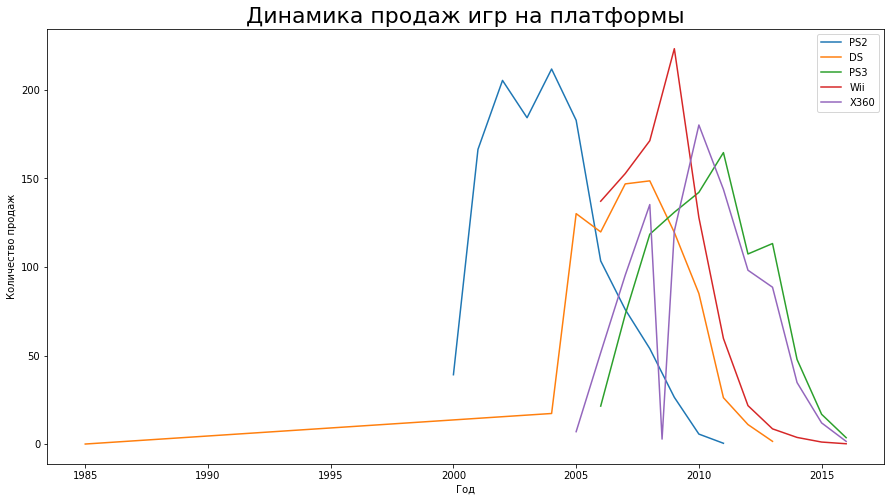

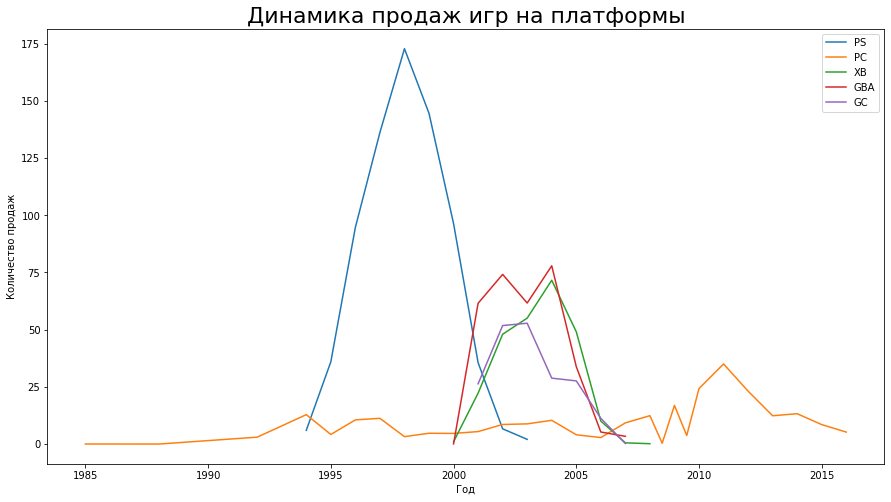

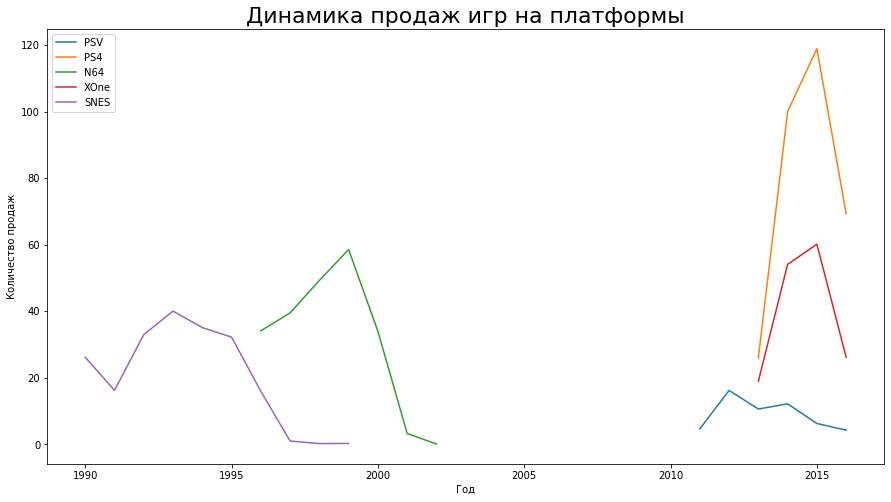

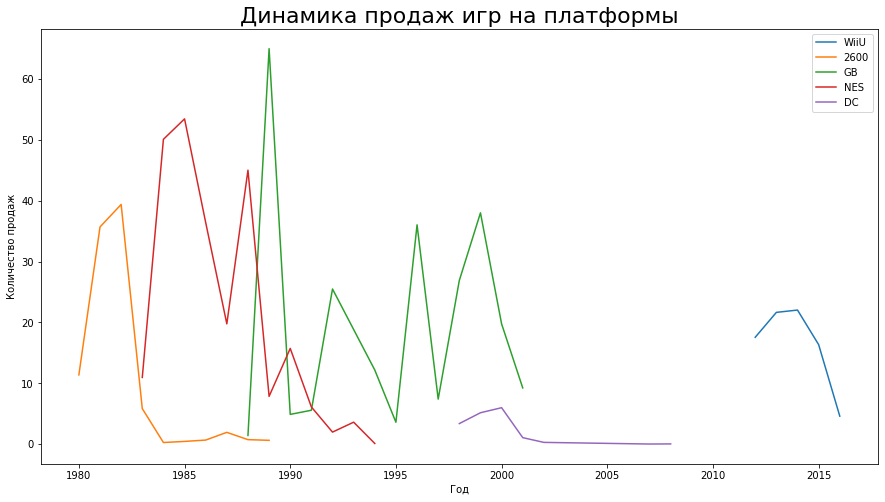

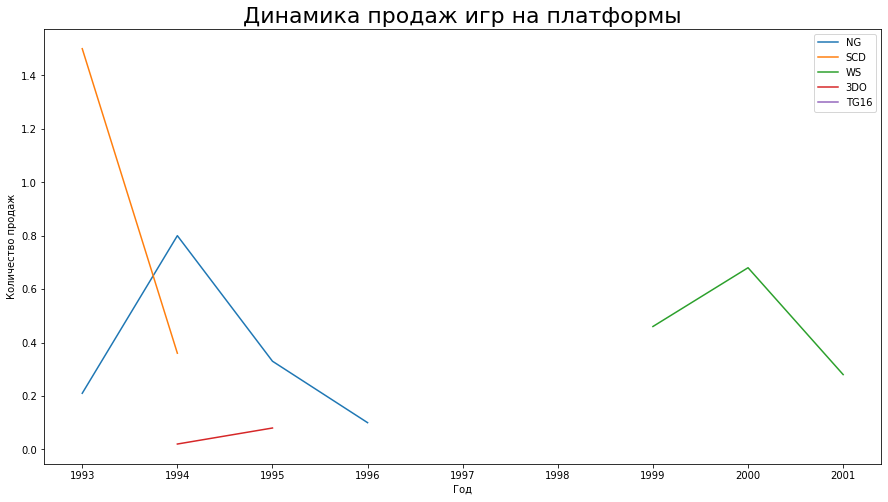

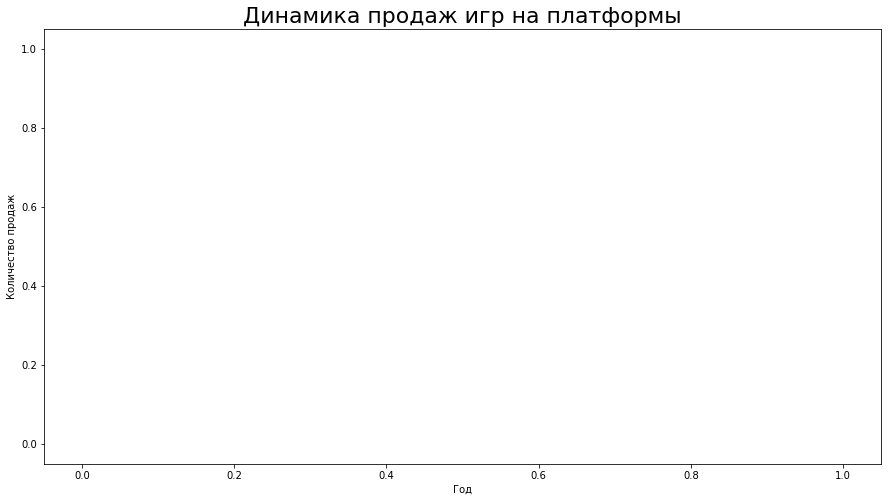

In [7]:
#ПОДВОДКА К РЕШЕНИЮ ОБ УДАЛЕНИИ/ИЗМЕНЕНИИ NaN ЗНАЧЕНИЙ В СТОЛБЦАХ С РЕЙТИНГАМИ
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


print(games['platform'].value_counts()) #сколько у нас в общем игр на платформы


#БЕЗ reset_index()
data_pivot_sales = games.pivot_table(index = 'year_of_release_after', columns = 'platform', values = 'sum_sales', aggfunc = 'sum')
print('PIVOT TABLE')
display(data_pivot_sales)
data_pivot_sales.info()
print('')

#СКОЛЬКО В СРЕДНЕМ АКТУАЛЬНА НА РЫНКЕ ИГРОВАЯ КОНСОЛЬ
print('МЕДИАНА')
print(data_pivot_sales.count().median())
print('СРЕДНЕЕ')
print(data_pivot_sales.count().mean())
print('')




#ПРИДУМАТЬ КАК СДЕЛАТЬ ГИСТОГРАММУ, ЛИБО ЖЕ ПО ВОЗРАСТАНИЮ, НО ГИСТОГРАММА ЛУЧШЕ, ЧТОБЫ ВЫЯСНИТЬ med or mean

#c = data_pivot_sales.columns

c = games['platform'].value_counts().index
'''
#data_pivot_sales.hist(column = data_pivot_sales.iloc[:,:])
data_pivot_sales_1 = data_pivot_sales.loc[ :, ['PS2', 'DS', 'PS3', 'Wii', 'X360', 'PSP', 'PS']]
data_pivot_sales_2 = data_pivot_sales.loc[ :, ['PC', 'XB', 'GBA', 'GC', '3DS', 'PSV', 'PS4']]
data_pivot_sales_3 = data_pivot_sales.loc[ :, ['N64', 'XOne', 'SNES', 'SAT', 'WiiU', '2600', 'GB']]
data_pivot_sales_5 = data_pivot_sales.loc[ :, ['NES', 'DC', 'GEN', 'NG', 'WS', 'SCD', '3DO']]
data_pivot_sales_6 = data_pivot_sales.loc[ :, ['TG16', 'PCFX', 'GG']]
'''

for i in range(len(c)):
    if i%6==5:
        figure = plt.figure(figsize=(15,8))
        sns.lineplot(data = data_pivot_sales.loc[ :, c[i-5:i]], dashes = False)
        plt.title("Динамика продаж игр на платформы", fontsize=22)
        plt.xlabel('Год')
        plt.ylabel('Количество продаж')
    elif i==len(c)-1:
        figure = plt.figure(figsize=(15,8))
        sns.lineplot(data = data_pivot_sales.loc[ :, c[i-(i%6):i]], dashes = False)
        plt.title("Динамика продаж игр на платформы", fontsize=22)
        plt.xlabel('Год')
        plt.ylabel('Количество продаж')


        

'''
for i in range(len(data_pivot_sales)):
    figure = plt.figure(figsize=(15,8))
    sns.lineplot(data = data_pivot_sales.iloc(:, :), dashes = False)
    plt.title("Динамика продаж игр на платформы", fontsize=22)
    plt.xlabel('Год')
    plt.ylabel('Количество продаж')
'''





'''
figure = plt.figure(figsize=(15,8))
sns.lineplot(data = data_pivot_sales_1, dashes = False)
plt.title("Динамика продаж игр на платформы", fontsize=22)
plt.xlabel('Год')
plt.ylabel('Количество продаж')


figure = plt.figure(figsize=(15,8))
sns.lineplot(data = data_pivot_sales_2, dashes = False)
plt.title("Динамика продаж игр на платформы", fontsize=22)
plt.xlabel('Год')
plt.ylabel('Количество продаж')


figure = plt.figure(figsize=(15,8))
sns.lineplot(data = data_pivot_sales_3, dashes = False)
plt.title("Динамика продаж игр на платформы", fontsize=22)
plt.xlabel('Год')
plt.ylabel('Количество продаж')


figure = plt.figure(figsize=(15,8))
sns.lineplot(data = data_pivot_sales_5, dashes = False)
plt.title("Динамика продаж игр на платформы", fontsize=22)
plt.xlabel('Год')
plt.ylabel('Количество продаж')


figure = plt.figure(figsize=(15,8))
sns.lineplot(data = data_pivot_sales_6, dashes = False)
plt.title("Динамика продаж игр на платформы", fontsize=22)
plt.xlabel('Год')
plt.ylabel('Количество продаж')


#display(data_pivot_sales_1)

#С reset_index()
data_pivot_sales_4 = data_pivot_sales.loc[ :, ['PS2', 'DS', 'PS3', 'Wii', 'X360', 'PSP', 'PS']]
data_pivot_sales_reset_index = data_pivot_sales_4.reset_index()
print('С ПРИМЕНЕНИЕМ reset_index')
display(data_pivot_sales_reset_index)
data_pivot_sales_reset_index.info()

print('С ПРИМЕНЕНИЕМ ВСЯ')
data_pivot_4_1 = data_pivot_sales.reset_index()
display(data_pivot_4_1)
data_pivot_4_1.info()
print('')
'''




'''
#РАЗОБРАТЬСЯ ЗАЧЕМ
figure = plt.figure(figsize=(15,8))
sns.lineplot(data = data_pivot_sales_reset_index.iloc[:,1:], dashes = False)
plt.title("Глянем", fontsize=22)
plt.xlabel('Год')
plt.ylabel('Количество продаж')
'''
#ПОСЛЕ ЭТОГО МОЖНО ДЕЛАТЬ ВЫВОД О ПРОПУСКАХ

<div class="alert alert-info">
<h1> Ответ: </h1>
Разбил по количеству выпущенных игр на платформу.
</div>

### Последующие 3 блока о том какие именно данные в столбцах с рейтингом отсутствуют

In [8]:
display(games)

print(games.groupby(['platform', 'name'])[['critic_score']])
display(games)

print('ГРУППИРОВКА ПО ПЛАТФОРМАМ')
#n = games.groupby(['platform', 'name'])[['platform', 'name', 'critic_score']].mean()
#display(n)
#n.info()

games.groupby(['platform'])[['critic_score']].mean()

#print(games.groupby(['name','platform'])[['critic_score']].median())

,name,platform,year_of_release_befor,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year_of_release_after,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8,E,2006.0,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,1985.0,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,2008.0,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8,E,2009.0,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,1996.0,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16708,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,2016.0,0.01
16709,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,2006.0,0.01
16710,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,2016.0,0.01
16711,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,2003.0,0.01


,name,platform,year_of_release_befor,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year_of_release_after,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8,E,2006.0,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,1985.0,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,2008.0,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8,E,2009.0,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,1996.0,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16708,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,2016.0,0.01
16709,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,2006.0,0.01
16710,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,2016.0,0.01
16711,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,2003.0,0.01


ГРУППИРОВКА ПО ПЛАТФОРМАМ


,critic_score
platform,
2600,NaN
3DO,NaN
3DS,67.101190
DC,87.357143
DS,63.761506
GB,NaN
GBA,67.372146
GC,69.488839
GEN,NaN


In [9]:
'''
#games.groupby(['platform'])[['user_score']].mean()


#display(games[games['platform'] == 'gb']['year_of_release_after'].value_counts())
'''
#games.groupby(['platform'])[['user_score']].mean()

#games['critic_score'] = games['critic_score'].astype('Int64')
games.info()

#games.groupby(['platform'])[['user_score']].mean()



display(games.groupby(['platform'])[['user_score']].count())
print(games['user_score'].value_counts())
games['user_score'] = games['user_score'].replace('tbd', np.nan)
print(games['user_score'].value_counts())
print(games['user_score'].isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 13 columns):
name                     16713 non-null object
platform                 16713 non-null object
year_of_release_befor    16444 non-null Int64
genre                    16713 non-null object
na_sales                 16713 non-null float64
eu_sales                 16713 non-null float64
jp_sales                 16713 non-null float64
other_sales              16713 non-null float64
critic_score             8137 non-null Int64
user_score               10014 non-null object
rating                   9949 non-null object
year_of_release_after    16713 non-null float64
sum_sales                16713 non-null float64
dtypes: Int64(2), float64(6), object(5)
memory usage: 1.7+ MB


,user_score
platform,
2600,0
3DO,0
3DS,230
DC,14
DS,1272
GB,0
GBA,517
GC,469
GEN,0


tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.9       2
1.3       2
0.6       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64
7.8    324
8      290
8.2    282
8.3    254
8.5    253
      ... 
1.9      2
1.3      2
0.6      2
0        1
9.7      1
Name: user_score, Length: 95, dtype: int64
9123


### Вывод относительно tbd значений и пропусков в столбцах рейтингов:

TBD(to be decided, будет определено) используется, когда что-то еще не решено или еще не известно.

В ходе анализа было принято решение оставить рейтинги без изменений, так как NaN значения по трём видам рейтинга может просто не быть из-за того, что оценивающие персоны просто не выполнили свою обязанность относительно конкретной игры, представленной в датасете.

Чтобы понять из-за чего у нас пропуски в пунктах с рейтингами, построим графики и представим сгруппированные таблицы. Возможно данные пропуски вовсе не случайны.



In [10]:
games_new = games.groupby(['platform', 'name'])[['rating']].count().reset_index().groupby(['platform'])[['rating']].sum()
display(games_new)
games_new.info()



'''
games_new_1 = games_new.groupby(['platform'])[['rating']].sum()
display(games_new_1)
#display(games_new['rating'])
'''
'''
games_pipivot = games.pivot_table(index = 'platform', columns = 'name', values = 'rating', aggfunc = 'count').T.reset_index()
display(games_pipivot)
games_pipivot.info()
#display(games_pipivot.T.reset_index().value_counts())
'''

,rating
platform,
2600,0
3DO,0
3DS,228
DC,14
DS,1273
GB,0
GBA,522
GC,469
GEN,0


<class 'pandas.core.frame.DataFrame'>
Index: 31 entries, 2600 to XOne
Data columns (total 1 columns):
rating    31 non-null int64
dtypes: int64(1)
memory usage: 496.0+ bytes


"\ngames_pipivot = games.pivot_table(index = 'platform', columns = 'name', values = 'rating', aggfunc = 'count').T.reset_index()\ndisplay(games_pipivot)\ngames_pipivot.info()\n#display(games_pipivot.T.reset_index().value_counts())\n"

Выяснилось, что оценки критиков и оценки пользователей вовсе отсутствуют у 14 платформ из 31. Т.е. группировать их по играм бессмысленно, чтобы заполнять пропуски.

Вот "выделившееся" платформы:
- 2600
- 3do
- gb
- gen
- gg
- n64
- nes
- ng
- pcfx
- sat
- scd
- snes
- tg16
- ws

<div class="alert alert-info" role="alert">
<b>ВЫВОД ОТНОСИТЕЛЬНО ПРОПУСКОВ В СТОЛБЦАХ С РЕЙТИНГОМ:</b>
    
 Смотря на каких платформах отсутствуют оценки, можно заметить, что 3 вида оценок, а именно: <b>"critic", "user_score" и "rating"</b> отсутствуют полностью на одних и тех же платформах. В ходе анализа можно заметить, что платформы достаточно старые, и в связи с этим сделать предположение, что в то время не писали отзывы так, как сейчас, если вообще писали. К тому же компания ESRB развернула свою деятельность в 1994 году, а игры на вышепредставленные консоли продавались либо намного раньше даты основания, либо же самую малость позже, когда компания ещё не разрослась до таких размеров, как сейчас. 

<b>В связи с этим делаем вывод:</b> отзывы на игры для платформ представленных списком выше не трогаем, не дополняем, так как они полностью пусты.     
</div>


### Вывод относительно пропусков:

Я считаю, что в данном случае, в столбцах с рейтингом бороться бесполезно, так как данных упущено слишком много. Придумывать новые смысла нет, так как если грамотно группировать таблицу, чтобы взять медианное или среднее значение, нам просто будет недостаточно значений.

### 3.1 Сколько игр выпускалось в разные годы <a id = '3.1'></a>
#### Взять из блока выше, где мы строили графики с суммарными продажами

In [11]:
#games.groupby(['name', 'year_of_release'])
games_1 = games.groupby(['name', 'year_of_release_after'])[['year_of_release_after']].count()
display(games_1)
print('')
#games_1.info()
print('')
print('КОЛИЧЕСТВО ИГР С ОДИНАКОВЫМ name ВЫПУЩЕННЫХ В ОДИН ГОД')
print(games_1['year_of_release_after'].count())
print('')
##games.info()
##display(games)
#display()
#games = games.reset_index(drop=False)
#display(games)


print('КОЛИЧЕСТВО ИГР ВЫПУЩЕННЫХ В ОДИН ГОД')
#print(games['year_of_release'].value_counts().count())
#print(games['year_of_release'].value_counts().sum())

games_year_count = games.groupby(['year_of_release_after']).count().reset_index()
#display(games_2['platform'].count())
display(games_year_count[['year_of_release_after', 'name']])
#display(games_2['name'].value_counts())
#display(games_2['year_of_release'].value_counts())
#display(games_2.reset_index())
#games_2.info()

,,year_of_release_after
name,year_of_release_after,
Beyblade Burst,2016.0,1
Fire Emblem Fates,2015.0,1
Frozen: Olaf's Quest,2013.0,2
Haikyu!! Cross Team Match!,2016.0,1
Tales of Xillia 2,2012.0,1
...,...,...
thinkSMART: Chess for Kids,2011.0,1
uDraw Studio,2010.0,1
uDraw Studio: Instant Artist,2011.0,2




КОЛИЧЕСТВО ИГР С ОДИНАКОВЫМ name ВЫПУЩЕННЫХ В ОДИН ГОД
12443

КОЛИЧЕСТВО ИГР ВЫПУЩЕННЫХ В ОДИН ГОД


,year_of_release_after,name
0,1980.0,9
1,1981.0,46
2,1982.0,53
3,1983.0,17
4,1984.0,14
5,1985.0,14
6,1986.0,21
7,1987.0,16
8,1988.0,15
9,1989.0,17


### УПОРЯДОЧИТЬ ПО УБЫВАНИЮ

### 3.2 <a id = '3.2'></a>
- #### Как менялись продажи по платформам. 
- #### Выбрать платформы с наибольшими продажами. 
- #### За какой срок в среднем появляются и исчезают платформы?

Данное уже выполнялось мною в блоках сверху, поэтому оставлю [ссылку](#ссылка_на_2.4) <a id = 'ссылка'></a>

In [12]:
'''
print(games['platform'].value_counts()) #сколько у нас в общем игр на платформы
print('')
#СКОЛЬКО В СРЕДНЕМ АКТУАЛЬНА НА РЫНКЕ ИГРОВАЯ КОНСОЛЬ
print('МЕДИАНА')
print(data_pivot_sales.count().median())
print('СРЕДНЕЕ')
print(data_pivot_sales.count().mean())
print('')

figure = plt.figure(figsize=(15,8))
sns.lineplot(data = data_pivot_sales_1, dashes = False)
plt.title("Динамика продаж игр на платформы", fontsize=22)
plt.xlabel('Год')
plt.ylabel('Количество продаж')


figure = plt.figure(figsize=(15,8))
sns.lineplot(data = data_pivot_sales_2, dashes = False)
plt.title("Динамика продаж игр на платформы", fontsize=22)
plt.xlabel('Год')
plt.ylabel('Количество продаж')


figure = plt.figure(figsize=(15,8))
sns.lineplot(data = data_pivot_sales_3, dashes = False)
plt.title("Динамика продаж игр на платформы", fontsize=22)
plt.xlabel('Год')
plt.ylabel('Количество продаж')


figure = plt.figure(figsize=(15,8))
sns.lineplot(data = data_pivot_sales_5, dashes = False)
plt.title("Динамика продаж игр на платформы", fontsize=22)
plt.xlabel('Год')
plt.ylabel('Количество продаж')


figure = plt.figure(figsize=(15,8))
sns.lineplot(data = data_pivot_sales_6, dashes = False)
plt.title("Динамика продаж игр на платформы", fontsize=22)
plt.xlabel('Год')
plt.ylabel('Количество продаж')
'''

'\nprint(games[\'platform\'].value_counts()) #сколько у нас в общем игр на платформы\nprint(\'\')\n#СКОЛЬКО В СРЕДНЕМ АКТУАЛЬНА НА РЫНКЕ ИГРОВАЯ КОНСОЛЬ\nprint(\'МЕДИАНА\')\nprint(data_pivot_sales.count().median())\nprint(\'СРЕДНЕЕ\')\nprint(data_pivot_sales.count().mean())\nprint(\'\')\n\nfigure = plt.figure(figsize=(15,8))\nsns.lineplot(data = data_pivot_sales_1, dashes = False)\nplt.title("Динамика продаж игр на платформы", fontsize=22)\nplt.xlabel(\'Год\')\nplt.ylabel(\'Количество продаж\')\n\n\nfigure = plt.figure(figsize=(15,8))\nsns.lineplot(data = data_pivot_sales_2, dashes = False)\nplt.title("Динамика продаж игр на платформы", fontsize=22)\nplt.xlabel(\'Год\')\nplt.ylabel(\'Количество продаж\')\n\n\nfigure = plt.figure(figsize=(15,8))\nsns.lineplot(data = data_pivot_sales_3, dashes = False)\nplt.title("Динамика продаж игр на платформы", fontsize=22)\nplt.xlabel(\'Год\')\nplt.ylabel(\'Количество продаж\')\n\n\nfigure = plt.figure(figsize=(15,8))\nsns.lineplot(data = data_pivot

Взять из предыдущих боксов.

В среднем платформа "живёт" чуть меньше 7 лет(7.8 лет).

# ЗАМЕЧАНИЕ: заполнение отсутствующих ячеек с годами помогла нам, так как у нас получилась боле точный период жизни платформы.

### 3.3 Выбрать актуальны период (2 пункта по списку) <a id = '3.3'></a>

platform,year_of_release_after,PS4
0,1980.0,NaN
1,1981.0,NaN
2,1982.0,NaN
3,1983.0,NaN
4,1984.0,NaN
5,1985.0,NaN
6,1986.0,NaN
7,1987.0,NaN
8,1988.0,NaN
9,1989.0,NaN


platform,year_of_release_after,PC
0,1980.0,NaN
1,1981.0,NaN
2,1982.0,NaN
3,1983.0,NaN
4,1984.0,NaN
5,1985.0,0.04
6,1986.0,NaN
7,1987.0,NaN
8,1988.0,0.03
9,1989.0,NaN


platform,year_of_release_after,XOne
0,1980.0,NaN
1,1981.0,NaN
2,1982.0,NaN
3,1983.0,NaN
4,1984.0,NaN
5,1985.0,NaN
6,1986.0,NaN
7,1987.0,NaN
8,1988.0,NaN
9,1989.0,NaN


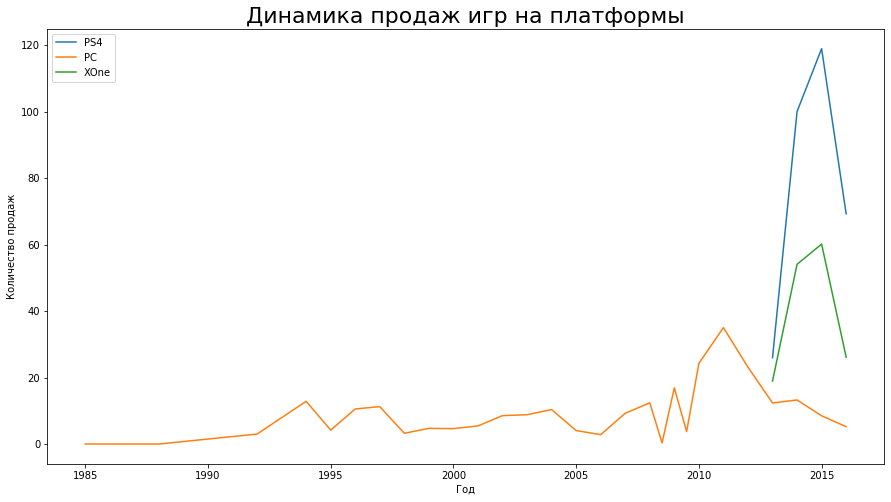

In [13]:
games_top_platforms = data_pivot_sales.loc[ :, ['PS4', 'PC', 'XOne']]

figure = plt.figure(figsize=(15,8))
sns.lineplot(data = games_top_platforms, dashes = False)
plt.title("Динамика продаж игр на платформы", fontsize=22)
plt.xlabel('Год')
plt.ylabel('Количество продаж')

display(data_pivot_sales.reset_index()[['year_of_release_after', 'PS4']])
display(data_pivot_sales.reset_index()[['year_of_release_after', 'PC']])
display(data_pivot_sales.reset_index()[['year_of_release_after', 'XOne']])

#display(data_pivot_sales['PC'])

Самым оптимальным периодом будет 2013-2016(т.е. 4 года).

### 3.4 <a id = '3.4'></a>
- #### [Какие платформы лидируют по продажам, растут или падают?](#plots) <a id = 'ссылка'></a>
- #### Выберите несколько потенциально прибыльных платформ.

Самыми потенциально прибыльными платформами, судя по таблицам, являются:
    - PS4 и XOne так как платформы относительно молодые;
    - PC так как хоть платформа и стара, но до сих пор пользуется популярностью и не сдаёт позиции.

### 3.5 Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Описать результат. <a id = '3.5\'></a>

platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
year_of_release_after,,,,,,,,,,,,,,,,,,,,,
1980.0,11.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981.0,35.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1982.0,39.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1983.0,5.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1984.0,0.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1985.0,0.45,NaN,NaN,NaN,0.02,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986.0,0.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1987.0,1.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1988.0,0.74,NaN,NaN,NaN,NaN,1.43,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
0,11.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,35.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,39.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.45,NaN,NaN,NaN,0.02,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.74,NaN,NaN,NaN,NaN,1.43,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.63,NaN,NaN,NaN,NaN,64.97,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 32 columns):
year_of_release_after    39 non-null float64
2600                     10 non-null float64
3DO                      2 non-null float64
3DS                      6 non-null float64
DC                       7 non-null float64
DS                       11 non-null float64
GB                       13 non-null float64
GBA                      8 non-null float64
GC                       7 non-null float64
GEN                      5 non-null float64
GG                       1 non-null float64
N64                      7 non-null float64
NES                      12 non-null float64
NG                       4 non-null float64
PC                       28 non-null float64
PCFX                     1 non-null float64
PS                       10 non-null float64
PS2                      12 non-null float64
PS3                      11 non-null float64
PS4                      4 non-null float64
PSP     

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


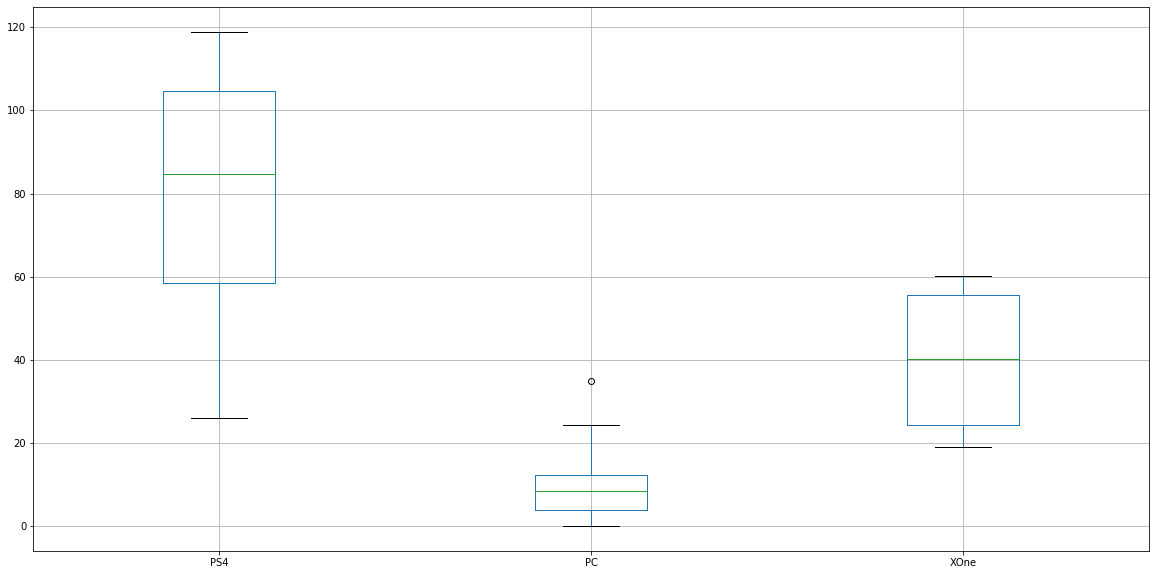

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


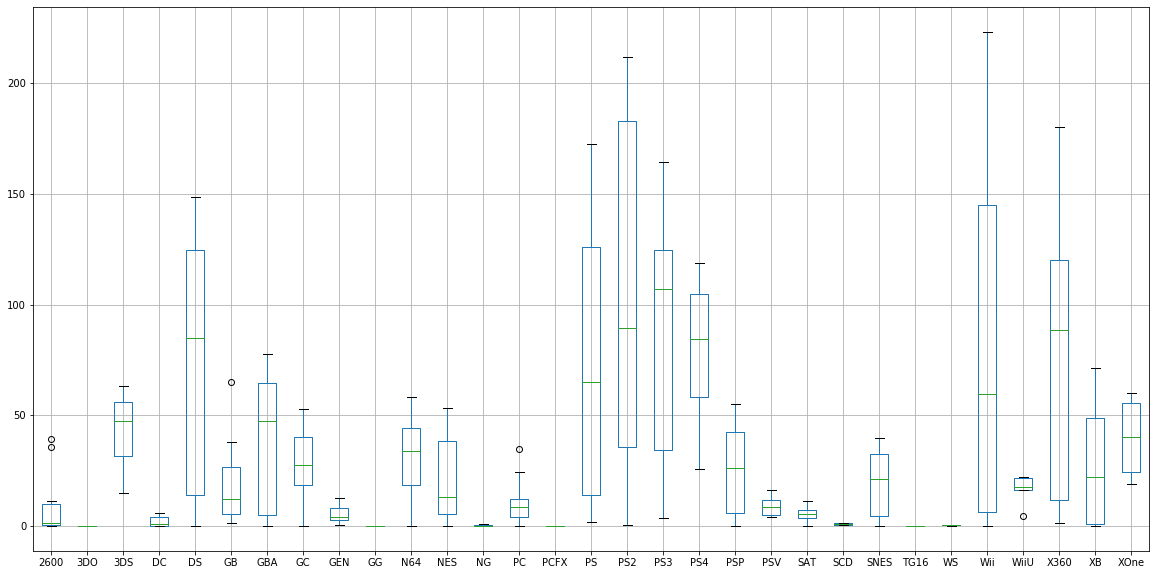

In [14]:
#data_pivot_sales = games.pivot_table(index = 'year_of_release_after', columns = 'platform', values = 'sum_sales', aggfunc = 'sum')
display(data_pivot_sales)
display(data_pivot_sales.reset_index(drop = True))
data_pivot_sales.reset_index().info()

figure = plt.figure(figsize=(20,10))
data_pivot_sales.reset_index(drop = True)[['PS4','PC','XOne']].boxplot()
plt.show()
figure = plt.figure(figsize=(20,10))
data_pivot_sales.reset_index(drop = True).boxplot()
plt.show()
#display(data_pivot_sales['PS4'].boxplot())

Можно сказать, что выбросов очень мало. 

# ПРОВЕРКА

In [15]:
print('Количество действительных значений в столбце с отзывами пользователей')
print(games['user_score'].value_counts().sum())
print('Количество NaN значений в столбце с отзывами пользователей')
print(games['user_score'].isna().sum())
print('')
print('Количество действительных значений в столбце с отзывами пользователей для PS4')
print(games[games['platform'] == 'PS4']['user_score'].value_counts().sum())
print('Количество NaN значений в столбце с отзывами пользователей для PS4')
print(games[games['platform'] == 'PS4']['user_score'].isna().sum())
print('')
print('Количество действительных значений в столбце с отзывами пользователей для PS4')
print(games[games['platform'] == 'PC']['user_score'].value_counts().sum())
print('Количество NaN значений в столбце с отзывами пользователей для PS4')
print(games[games['platform'] == 'PC']['user_score'].isna().sum())
print('')
print('Количество действительных значений в столбце с отзывами пользователей для PS4')
print(games[games['platform'] == 'XOne']['user_score'].value_counts().sum())
print('Количество NaN значений в столбце с отзывами пользователей для PS4')
print(games[games['platform'] == 'XOne']['user_score'].isna().sum())
print('')
games.info()
print(games['user_score'].value_counts().sum() + games['user_score'].isna().sum())

Количество действительных значений в столбце с отзывами пользователей
7590
Количество NaN значений в столбце с отзывами пользователей
9123

Количество действительных значений в столбце с отзывами пользователей для PS4
257
Количество NaN значений в столбце с отзывами пользователей для PS4
135

Количество действительных значений в столбце с отзывами пользователей для PS4
770
Количество NaN значений в столбце с отзывами пользователей для PS4
204

Количество действительных значений в столбце с отзывами пользователей для PS4
182
Количество NaN значений в столбце с отзывами пользователей для PS4
65

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 13 columns):
name                     16713 non-null object
platform                 16713 non-null object
year_of_release_befor    16444 non-null Int64
genre                    16713 non-null object
na_sales                 16713 non-null float64
eu_sales                 16713 non-null float64
jp_sale

## 3.6  <a id = '3.6'></a>
#### - Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. 
#### - Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

Выберем в качестве такой платформы PS4.

In [16]:
#display(games)
games.info()
games['critic_score'] = games['critic_score'].astype('float')
games['user_score'] = games['user_score'].astype('float')

games.info()
print('corr critic_score и eu_sales')
print(games[games['platform'] == 'PS4']['critic_score'].corr(games[games['platform'] == 'PS4']['eu_sales']))
print('corr user_score и eu_sales')
print(games[games['platform'] == 'PS4']['user_score'].corr(games[games['platform'] == 'PS4']['eu_sales']))

#print(games[games['platform'] == 'PS4']['sum_sales'].corr(games[games['platform'] == 'PS4']['critic_score']))
#print(games['na_sales'].corr(games['user_score']))

games_new_1 = games.dropna(axis = 0) #games с дропнутыми индексами
display(games_new_1)
print('PS4')
print(games[games['platform'] == 'PS4']['critic_score'].corr(games[games['platform'] == 'PS4']['sum_sales']))
print(games[games['platform'] == 'PS4']['user_score'].corr(games[games['platform'] == 'PS4']['sum_sales']))
print('')
print(games_new_1[games_new_1['platform'] == 'PS4']['critic_score'].corr(games_new_1[games_new_1['platform'] == 'PS4']['sum_sales']))
print(games_new_1[games_new_1['platform'] == 'PS4']['user_score'].corr(games_new_1[games_new_1['platform'] == 'PS4']['sum_sales']))
print('')
print('PC')
print(games[games['platform'] == 'PC']['critic_score'].corr(games[games['platform'] == 'PC']['sum_sales']))
print(games[games['platform'] == 'PC']['user_score'].corr(games[games['platform'] == 'PC']['sum_sales']))
print('')
print(games_new_1[games_new_1['platform'] == 'PC']['critic_score'].corr(games_new_1[games_new_1['platform'] == 'PC']['sum_sales']))
print(games_new_1[games_new_1['platform'] == 'PC']['user_score'].corr(games_new_1[games_new_1['platform'] == 'PC']['sum_sales']))
print('')
print('XOne')
print(games[games['platform'] == 'XOne']['critic_score'].corr(games[games['platform'] == 'XOne']['sum_sales']))
print(games[games['platform'] == 'XOne']['user_score'].corr(games[games['platform'] == 'XOne']['sum_sales']))
print('')
print(games_new_1[games_new_1['platform'] == 'XOne']['critic_score'].corr(games_new_1[games_new_1['platform'] == 'XOne']['sum_sales']))
print(games_new_1[games_new_1['platform'] == 'XOne']['user_score'].corr(games_new_1[games_new_1['platform'] == 'XOne']['sum_sales']))


print('Корреляционная матрица платформы PS4')
corr_PS4 = games[games['platform'] == 'PS4'].corr()
display(corr_PS4)
print('Корреляционная матрица платформы PC')
corr_PC = games[games['platform'] == 'PC'].corr()
display(corr_PC)
print('Корреляционная матрица платформы XOne')
corr_XOne = games[games['platform'] == 'XOne'].corr()
display(corr_XOne)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 13 columns):
name                     16713 non-null object
platform                 16713 non-null object
year_of_release_befor    16444 non-null Int64
genre                    16713 non-null object
na_sales                 16713 non-null float64
eu_sales                 16713 non-null float64
jp_sales                 16713 non-null float64
other_sales              16713 non-null float64
critic_score             8137 non-null Int64
user_score               7590 non-null object
rating                   9949 non-null object
year_of_release_after    16713 non-null float64
sum_sales                16713 non-null float64
dtypes: Int64(2), float64(6), object(5)
memory usage: 1.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 13 columns):
name                     16713 non-null object
platform                 16713 non-null object
year_of_releas

,name,platform,year_of_release_befor,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year_of_release_after,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,2006.0,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,2008.0,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,2009.0,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,2006.0,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,2006.0,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16661,E.T. The Extra-Terrestrial,GBA,2001,Action,0.01,0.00,0.00,0.00,46.0,2.4,E,2001.0,0.01
16671,Mortal Kombat: Deadly Alliance,GBA,2002,Fighting,0.01,0.00,0.00,0.00,81.0,8.8,M,2002.0,0.01
16690,Metal Gear Solid V: Ground Zeroes,PC,2014,Action,0.00,0.01,0.00,0.00,80.0,7.6,M,2014.0,0.01
16694,Breach,PC,2011,Shooter,0.01,0.00,0.00,0.00,61.0,5.8,T,2011.0,0.01


PS4
0.40656790206178095
-0.031957110204556424

0.4035729107357781
-0.03088781296873357

PC
0.2568867378948215
0.010475684621486417

0.25598345665790934
0.0019767944723065854

XOne
0.4169983280084017
-0.06892505328279414

0.409929586886011
-0.07591595053938044
Корреляционная матрица платформы PS4


,year_of_release_befor,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,year_of_release_after,sum_sales
year_of_release_befor,1.000000,-0.248961,-0.208306,-0.060993,-0.234796,-0.021142,0.152447,1.000000,-0.235032
na_sales,-0.248961,1.000000,0.785362,0.472981,0.944259,0.415008,-0.020933,-0.248961,0.928160
eu_sales,-0.208306,0.785362,1.000000,0.464563,0.944698,0.346720,-0.048925,-0.208306,0.958157
jp_sales,-0.060993,0.472981,0.464563,1.000000,0.496467,0.322358,0.171332,-0.060993,0.527129
other_sales,-0.234796,0.944259,0.944698,0.496467,1.000000,0.409191,-0.035639,-0.234796,0.998051
critic_score,-0.021142,0.415008,0.346720,0.322358,0.409191,1.000000,0.557654,-0.021142,0.406568
user_score,0.152447,-0.020933,-0.048925,0.171332,-0.035639,0.557654,1.000000,0.152447,-0.031957
year_of_release_after,1.000000,-0.248961,-0.208306,-0.060993,-0.234796,-0.021142,0.152447,1.000000,-0.235032
sum_sales,-0.235032,0.928160,0.958157,0.527129,0.998051,0.406568,-0.031957,-0.235032,1.000000


Корреляционная матрица платформы PC


,year_of_release_befor,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,year_of_release_after,sum_sales
year_of_release_befor,1.000000,-0.251709,-0.102771,-0.084861,0.012869,-0.167772,-0.369399,0.999405,-0.191985
na_sales,-0.251709,1.000000,0.406504,0.399241,0.393763,0.192117,0.040349,-0.251589,0.806029
eu_sales,-0.102771,0.406504,1.000000,-0.015430,0.559366,0.222479,-0.011813,-0.102427,0.863323
jp_sales,-0.084861,0.399241,-0.015430,1.000000,-0.015282,0.095064,0.067887,-0.084999,0.203516
other_sales,0.012869,0.393763,0.559366,-0.015282,1.000000,0.209204,-0.027600,0.013247,0.639056
critic_score,-0.167772,0.192117,0.222479,0.095064,0.209204,1.000000,0.557752,-0.166244,0.256887
user_score,-0.369399,0.040349,-0.011813,0.067887,-0.027600,0.557752,1.000000,-0.366940,0.010476
year_of_release_after,0.999405,-0.251589,-0.102427,-0.084999,0.013247,-0.166244,-0.366940,1.000000,-0.191468
sum_sales,-0.191985,0.806029,0.863323,0.203516,0.639056,0.256887,0.010476,-0.191468,1.000000


Корреляционная матрица платформы XOne


,year_of_release_befor,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,year_of_release_after,sum_sales
year_of_release_befor,1.000000,-0.242667,-0.194925,-0.127050,-0.243414,0.063712,0.079481,1.000000,-0.239183
na_sales,-0.242667,1.000000,0.765367,0.425725,0.988088,0.388636,-0.069318,-0.242667,0.970433
eu_sales,-0.194925,0.765367,1.000000,0.421071,0.852986,0.379162,-0.055911,-0.194925,0.898045
jp_sales,-0.127050,0.425725,0.421071,1.000000,0.441717,0.202954,0.069591,-0.127050,0.452701
other_sales,-0.243414,0.988088,0.852986,0.441717,1.000000,0.411825,-0.069645,-0.243414,0.995238
critic_score,0.063712,0.388636,0.379162,0.202954,0.411825,1.000000,0.472462,0.063712,0.416998
user_score,0.079481,-0.069318,-0.055911,0.069591,-0.069645,0.472462,1.000000,0.079481,-0.068925
year_of_release_after,1.000000,-0.242667,-0.194925,-0.127050,-0.243414,0.063712,0.079481,1.000000,-0.239183
sum_sales,-0.239183,0.970433,0.898045,0.452701,0.995238,0.416998,-0.068925,-0.239183,1.000000


<div class="alert alert-success">
<h1> Комментарий от ревьюера</h1>
Лучше использовать матрицу корреляций так будет нагляднее
</div>

<div class="alert alert-info">
<h1> Ответ на комментарий от ревьюера СВЕРХУ</h1>
Да, действительно, так больше всего видно, можно сразу глянуть на всё. Да и просто проще!
</div>

critic_score

critic_score

user_score

user_score


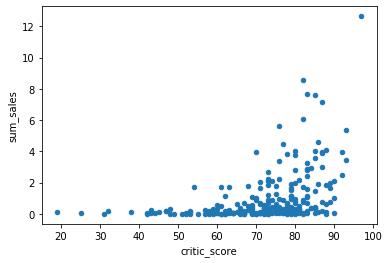

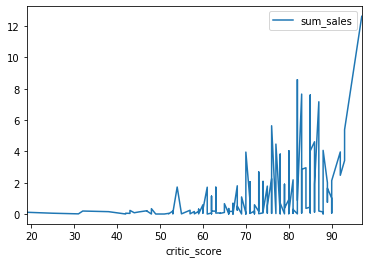

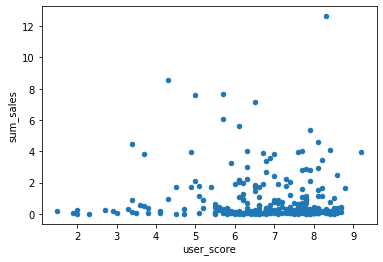

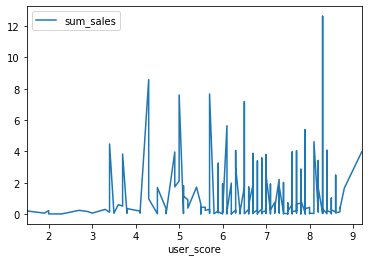

In [17]:
#ДИАГРАММА РАССЕЯНИЯ
print('critic_score')
games[games['platform'] == 'PS4'].plot(x='critic_score', y='sum_sales', kind='scatter') #games[games['platform'] == 'PS4']
print('')
print('critic_score')
games[games['platform'] == 'PS4'].sort_values('critic_score').plot(x='critic_score', y='sum_sales') 

print('')
print('user_score')
games[games['platform'] == 'PS4'].plot(x='user_score', y='sum_sales', kind='scatter') 
print('')
print('user_score')
games[games['platform'] == 'PS4'].sort_values('user_score').plot(x='user_score', y='sum_sales') 

Если взглянуть на диаграммы рассеивания, то можно сказать, что саммарные продажи зависят отзывов пользователей и критиков.

<div class="alert alert-info" role="alert">
    <b>ВЫВОД ОТНОСИТЕЛЬНО ЗНАЧИМОСТИ:</b>
    
Вообще, если подумать изначально, не смотря на данные, можно прийти к выводу о том, что отзывы напрямую влиют на объём продаж. Т.е. если об игре только самые лучшие отзывы, то логично, что её будут покупить больше. Но в данном случае такой зависимости мы не наблюдаем. 

<b>Какой выход из этой ситуации я вижу сейчас:</b> по платформе PC можно заполнить пропуски, сгруппировав таблицу по платформе и жанрам, вычислить медианные значения, и заполнить NaN значения ими, примерно, как мы делали с пропусками в годах <b>(было в боксе выше).</b>
</div>

В ходе сравнение даиграмм рассеивания и корреляции можно сказать, что результаты были бы куда ближе к действительности, если данные по отзывам были более полными.

# НА ЭТОМ ЗАКОНЧИЛ ВЕЧЕРОМ ВТОРНИКА
## ВОПРОС С ПРОПУСКАМИ В ОЦЕНКАХ

### 3.7 Соотнесите выводы с продажами игр на других платформах. <a id = '3.7'></a>

critic_score

critic_score

user_score

user_score


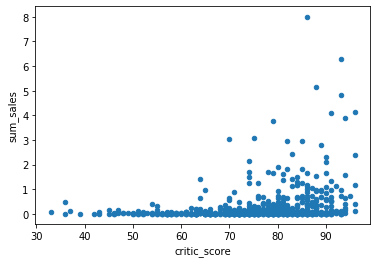

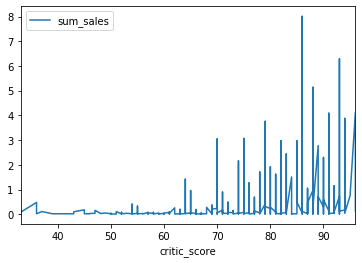

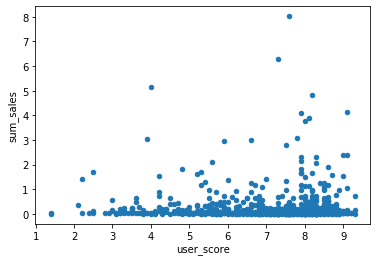

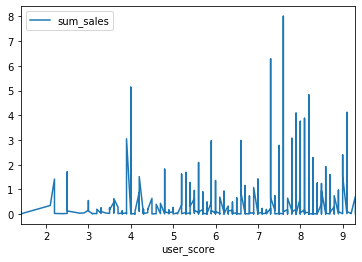

In [18]:
print('critic_score')
games[games['platform'] == 'PC'].plot(x='critic_score', y='sum_sales', kind='scatter')
print('')
print('critic_score')
games[games['platform'] == 'PC'].sort_values('critic_score').plot(x='critic_score', y='sum_sales') 

print('')
print('user_score')
games[games['platform'] == 'PC'].plot(x='user_score', y='sum_sales', kind='scatter') 
print('')
print('user_score')
games[games['platform'] == 'PC'].sort_values('user_score').plot(x='user_score', y='sum_sales') 

critic_score

critic_score

user_score

user_score


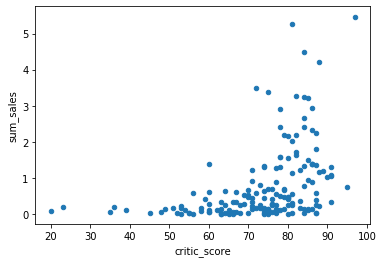

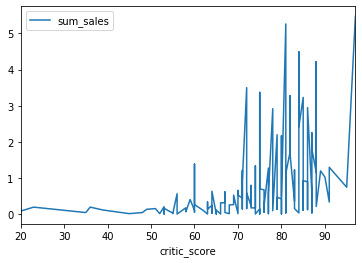

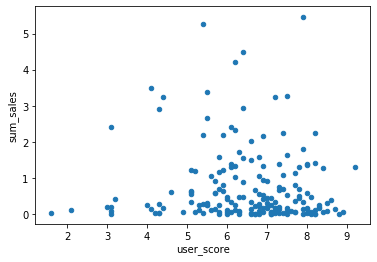

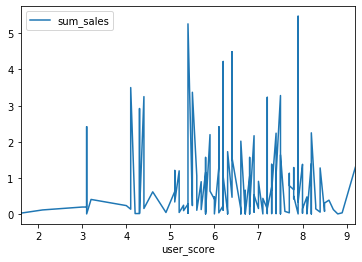

In [19]:
print('critic_score')
games[games['platform'] == 'XOne'].plot(x='critic_score', y='sum_sales', kind='scatter') 
print('')
print('critic_score')
games[games['platform'] == 'XOne'].sort_values('critic_score').plot(x='critic_score', y='sum_sales') 

print('')
print('user_score')
games[games['platform'] == 'XOne'].plot(x='user_score', y='sum_sales', kind='scatter') 
print('')
print('user_score')
games[games['platform'] == 'XOne'].sort_values('user_score').plot(x='user_score', y='sum_sales') 

Выводи похожи: из-за большого количества NaN значений картина для трёх топовых платформ (PS4, PC и XOne) практически одинакова. Продажи безусловно должны БОЛЬШЕ зависеть от отзывов.

### 3.8 Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами? <a id = '3.8'></a>

,sum_sales
genre,
Action,3369
Adventure,1303
Fighting,849
Misc,1750
Platform,888
Puzzle,580
Racing,1249
Role-Playing,1498
Shooter,1323


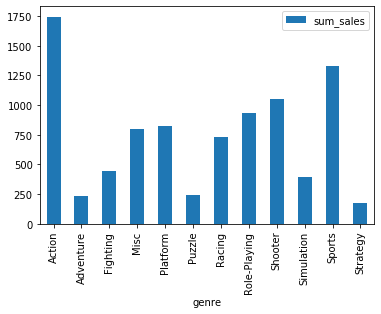

In [20]:
games.groupby(['genre'])[['sum_sales']].sum().plot(kind = 'bar')
games.groupby(['genre'])[['sum_sales']].count()

Лидирующие места по количеству проданных копий ожидаемо занимают action, sports и shooter.

То же самое, но уже о последних местах, можно сказать о жанрах puzzle и strategy.

Здесь всё так, как должно быть, так как игры жанра action, sports и shooter всегда интересовали пользователя больше, чем игры жанра puzzle и strategy. Это ни в коем случае не говорит, что игры жанра puzzle и strategy вовсе не пользуются спросом, но, смотря на общую картину, можно сказать, что игры данных жанров интересуют пользователя меньше всего.

Данные жанры интересуют людей больше всего, потому что более динамичные игры всегда больше инторесовали пользователя.

### Шаг 4 <a id = '4.1'></a>
#### 4.1 
#### - Составьте портрет пользователя каждого региона
#### - Определите для пользователя каждого региона (NA, EU, JP):
#### - Самые популярные платформы (топ-5). Опишите различия в долях продаж.


   platform  na_sales
28     X360    602.47
16      PS2    583.84
26      Wii    496.90
17      PS3    393.49
4        DS    382.40
   platform  eu_sales
16      PS2    339.29
17      PS3    330.29
28     X360    270.76
26      Wii    262.21
15       PS    213.61
   platform  jp_sales
4        DS    175.57
15       PS    139.82
16      PS2    139.20
23     SNES    116.55
2       3DS    100.67


([<matplotlib.patches.Wedge at 0x7fd8d2415c50>,
 [Text(0.7496226234290845, 0.8050254172653788, 'DS'),
  Text(-0.7295193738604844, 0.8232869992670885, 'PS'),
  Text(-0.9861097393239319, -0.4874295662046849, 'PS2'),
  Text(0.09255867116001763, -1.096098942793529, 'SNES'),
  Text(0.9803441576014145, -0.4989241752578976, '3DS')],
 [Text(0.4088850673249551, 0.43910477305384293, '26.1%'),
  Text(-0.3979196584693551, 0.44906563596386645, '20.8%'),
  Text(-0.5378780396312355, -0.2658706724752826, '20.7%'),
  Text(0.050486547905464155, -0.5978721506146522, '17.3%'),
  Text(0.5347331768734988, -0.2721404592315805, '15.0%')])

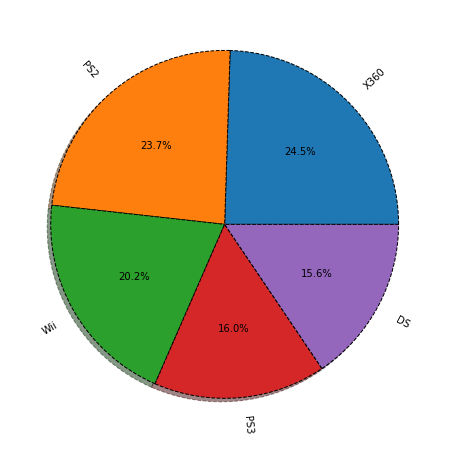

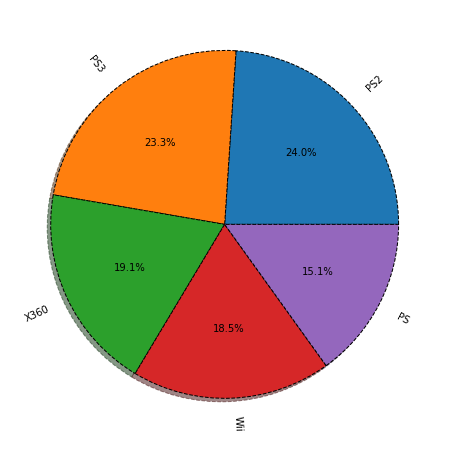

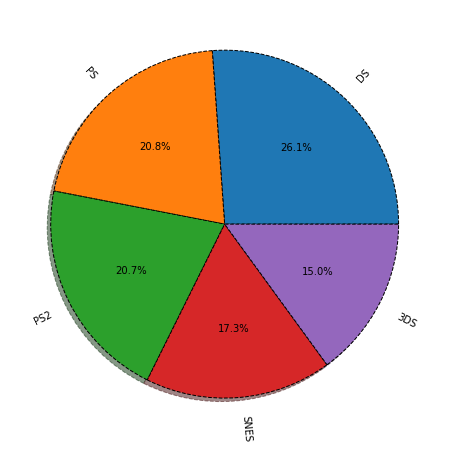

In [21]:
games_group_na_5 = games.groupby(['platform'])[['na_sales']].sum().reset_index()
games_group_eu_5 = games.groupby(['platform'])[['eu_sales']].sum().reset_index()
games_group_jp_5 = games.groupby(['platform'])[['jp_sales']].sum().reset_index()
print(games_group_na_5.sort_values(by = 'na_sales', ascending = False).head(5))
print(games_group_eu_5.sort_values(by = 'eu_sales', ascending = False).head(5))
print(games_group_jp_5.sort_values(by = 'jp_sales', ascending = False).head(5))

games_group_na_5_sort = games_group_na_5.sort_values(by = 'na_sales', ascending = False).head(5)
games_group_eu_5_sort = games_group_eu_5.sort_values(by = 'eu_sales', ascending = False).head(5)
games_group_jp_5_sort = games_group_jp_5.sort_values(by = 'jp_sales', ascending = False).head(5)
#games_group_na_5.info()



#figure = plt.figure(figsize=(15,8))
fig, ax = plt.subplots(figsize=(15,8))
ax.pie(games_group_na_5_sort['na_sales'], labels=games_group_na_5_sort['platform'], autopct='%1.1f%%', shadow=True, wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"}, rotatelabels=True)
#ax.axis("equal")


fig, ax = plt.subplots(figsize=(15,8))
ax.pie(games_group_eu_5_sort['eu_sales'], labels=games_group_eu_5_sort['platform'], autopct='%1.1f%%', shadow=True, wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"}, rotatelabels=True)
#ax.axis("equal")


fig, ax = plt.subplots(figsize=(15,8))
ax.pie(games_group_jp_5_sort['jp_sales'], labels=games_group_jp_5_sort['platform'], autopct='%1.1f%%', shadow=True, wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"}, rotatelabels=True)
#ax.axis("equal")

За 100% было взято общее число покупок из рейтинга ТОП-5.

В целом разница между между регионами по предпочтению платформ минимальная. Смотря на диаграммы можно увидеть, что если даже и есть различия в долях, то они минимальны, и можно сделать вывод о том, что разницы нет.

### 4.2 Самые популярные жанры (топ-5). Поясните разницу. <a id = '4.2'></a>

       genre  na_sales
0     Action    879.01
10    Sports    684.43
8    Shooter    592.24
4   Platform    445.50
3       Misc    407.27
      genre  eu_sales
0    Action    519.13
10   Sports    376.79
8   Shooter    317.34
6    Racing    236.51
3      Misc    212.74
           genre  jp_sales
7   Role-Playing    355.41
0         Action    161.43
10        Sports    135.54
4       Platform    130.83
3           Misc    108.11


(-1.1110939798690178,
 1.1005283347396777,
 -1.1124425591675242,
 1.118110883073502)

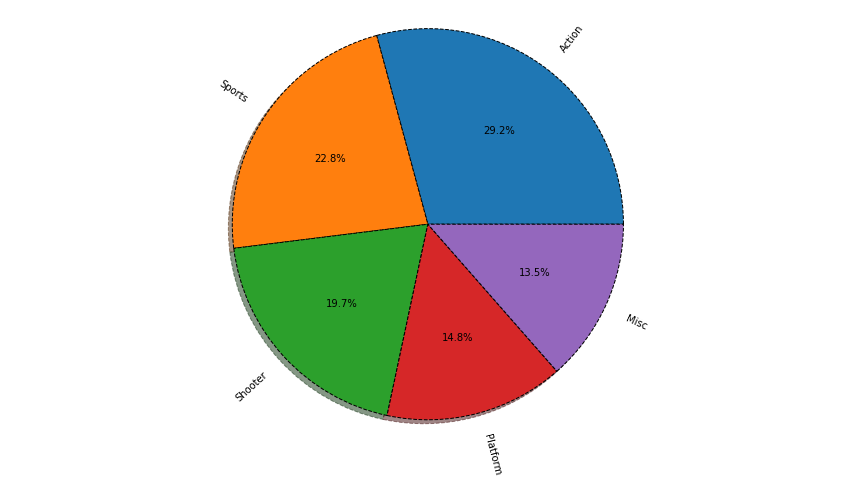

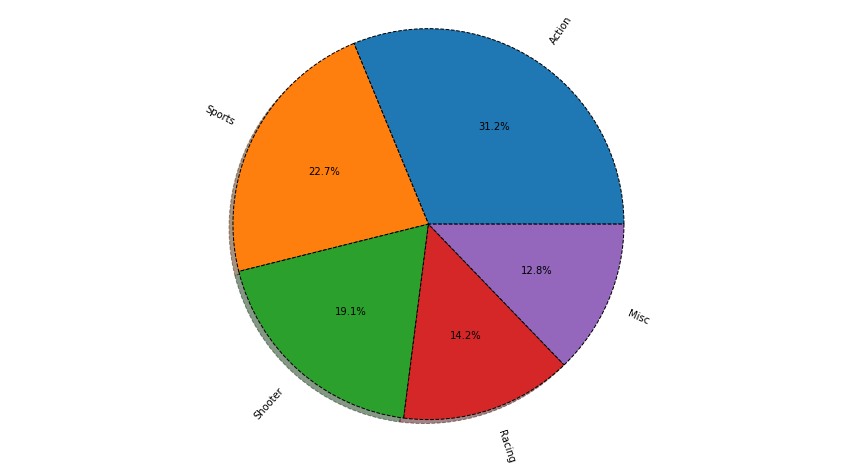

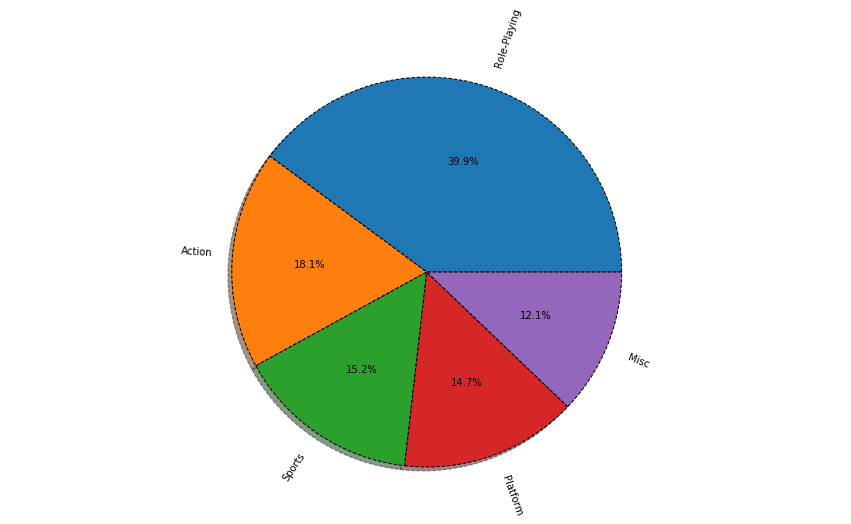

In [22]:
games_group_genre_na_5 = games.groupby(['genre'])[['na_sales']].sum().reset_index()
games_group_genre_eu_5 = games.groupby(['genre'])[['eu_sales']].sum().reset_index()
games_group_genre_jp_5 = games.groupby(['genre'])[['jp_sales']].sum().reset_index()
print(games_group_genre_na_5.sort_values(by = 'na_sales', ascending = False).head(5))
print(games_group_genre_eu_5.sort_values(by = 'eu_sales', ascending = False).head(5))
print(games_group_genre_jp_5.sort_values(by = 'jp_sales', ascending = False).head(5))

games_group_genre_na_5_sort = games_group_genre_na_5.sort_values(by = 'na_sales', ascending = False).head(5)
games_group_genre_eu_5_sort = games_group_genre_eu_5.sort_values(by = 'eu_sales', ascending = False).head(5)
games_group_genre_jp_5_sort = games_group_genre_jp_5.sort_values(by = 'jp_sales', ascending = False).head(5)
#games_group_na_5.info()
#print(games_group_genre_na_5_sort)
#print(games_group_genre_eu_5_sort)
#print(games_group_genre_jp_5_sort)


#figure = plt.figure(figsize=(15,8))
fig, ax = plt.subplots(figsize=(15,8))
ax.pie(games_group_genre_na_5_sort['na_sales'], labels=games_group_genre_na_5_sort['genre'], autopct='%1.1f%%', shadow=True, wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"}, rotatelabels=True)
ax.axis("equal")


fig, ax = plt.subplots(figsize=(15,8))
ax.pie(games_group_genre_eu_5_sort['eu_sales'], labels=games_group_genre_eu_5_sort['genre'], autopct='%1.1f%%', shadow=True, wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"}, rotatelabels=True)
ax.axis("equal")


fig, ax = plt.subplots(figsize=(15,8))
ax.pie(games_group_genre_jp_5_sort['jp_sales'], labels=games_group_genre_jp_5_sort['genre'], autopct='%1.1f%%', shadow=True, wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"}, rotatelabels=True)
ax.axis("equal")


Судя по диаграммам, по жанрам вывод такой же, что и по платформам в боксе выше.

### 4.3 Влияет ли рейтинг ESRB на продажи в отдельном регионе? <a id = '4.3'></a>

  rating  na_sales
1      E   1292.99
7      T    759.75
5      M    748.48
2   E10+    353.32
4    K-A      2.56
  rating  eu_sales
1      E    710.25
5      M    483.97
7      T    427.03
2   E10+    188.52
0     AO      0.61
  rating  jp_sales
1      E    198.11
7      T    151.40
5      M     64.24
2   E10+     40.20
4    K-A      1.46


(-1.1140860484408095, 1.100670764211467, -1.115105443683915, 1.127806255998541)

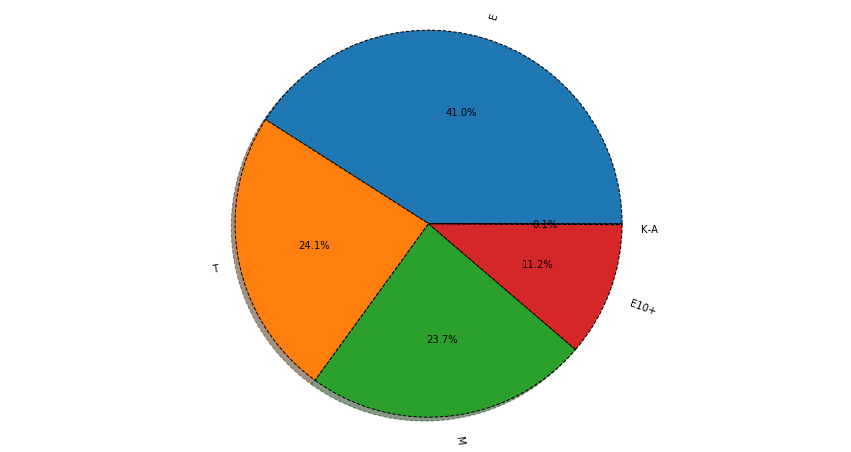

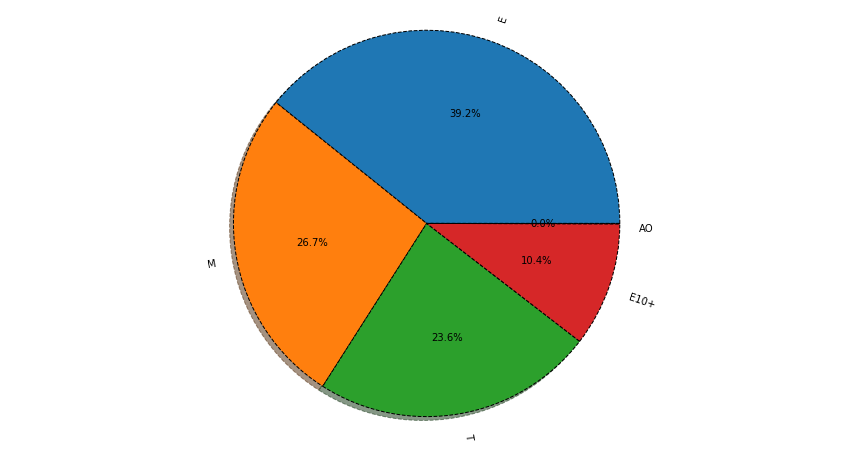

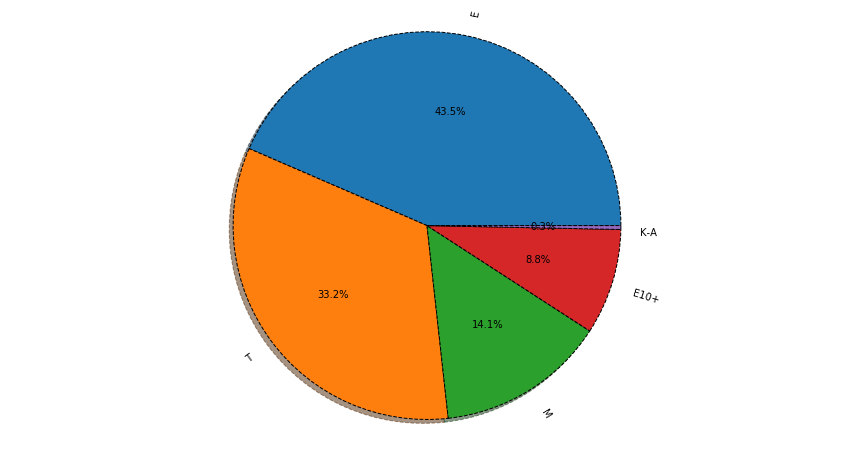

In [23]:
games_group_rating_na_5 = games.groupby(['rating'])[['na_sales']].sum().reset_index()
games_group_rating_eu_5 = games.groupby(['rating'])[['eu_sales']].sum().reset_index()
games_group_rating_jp_5 = games.groupby(['rating'])[['jp_sales']].sum().reset_index()
print(games_group_rating_na_5.sort_values(by = 'na_sales', ascending = False).head(5))
print(games_group_rating_eu_5.sort_values(by = 'eu_sales', ascending = False).head(5))
print(games_group_rating_jp_5.sort_values(by = 'jp_sales', ascending = False).head(5))

games_group_rating_na_5_sort = games_group_rating_na_5.sort_values(by = 'na_sales', ascending = False).head(5)
games_group_rating_eu_5_sort = games_group_rating_eu_5.sort_values(by = 'eu_sales', ascending = False).head(5)
games_group_rating_jp_5_sort = games_group_rating_jp_5.sort_values(by = 'jp_sales', ascending = False).head(5)
#games_group_na_5.info()
#print(games_group_genre_na_5_sort)
#print(games_group_genre_eu_5_sort)
#print(games_group_genre_jp_5_sort)


#figure = plt.figure(figsize=(15,8))
fig, ax = plt.subplots(figsize=(15,8))
ax.pie(games_group_rating_na_5_sort['na_sales'], labels=games_group_rating_na_5_sort['rating'], autopct='%1.1f%%', shadow=True, wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"}, rotatelabels=True)
ax.axis("equal")


fig, ax = plt.subplots(figsize=(15,8))
ax.pie(games_group_rating_eu_5_sort['eu_sales'], labels=games_group_rating_eu_5_sort['rating'], autopct='%1.1f%%', shadow=True, wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"}, rotatelabels=True)
ax.axis("equal")


fig, ax = plt.subplots(figsize=(15,8))
ax.pie(games_group_rating_jp_5_sort['jp_sales'], labels=games_group_rating_jp_5_sort['rating'], autopct='%1.1f%%', shadow=True, wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"}, rotatelabels=True)
ax.axis("equal")


Замечено лишь то, что в Японии играм с рейтингом M больше предпочитаются игры рейтинга T.

### 5 Проверьте гипотезы <a id = '5.1'></a>
#### 5.1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;


H0: Средние пользовательские рейтинги платформ Xbox One и PC различаются 

H1: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

<div class="alert alert-block alert-info">
<h1> Исправление:</h1>
Нулевая гипотеза - это тип гипотеза, который предполагает, что нет никакой разницы между некоторыми характеристиками.
    
    
H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

H1: Средние пользовательские рейтинги платформ Xbox One и PC различаются
</div>

In [32]:
from scipy import stats as st

games = games[games['year_of_release_after'] >= 2013]
#display(games)

XOne = games[(games['platform'] == 'XOne') ]['user_score'].dropna()
PC = games[(games['platform'] == 'PC') ]['user_score'].dropna()

alpha = .05

results = st.ttest_ind(
    XOne,
    PC,
    equal_var = False)

print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Принимаем нулевую гипотезу") 

p-значение:  0.14759594013430463
Принимаем нулевую гипотезу


### 5.2 Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные. <a id = '5.2'></a>

H0: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

H1: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые

<div class="alert alert-block alert-info">
<h1> Исправление:</h1>
Нулевая гипотеза - это тип гипотеза, который предполагает, что нет никакой разницы между некоторыми характеристиками.
    
    
H0: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые

H1: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

In [31]:
from scipy import stats as st

Action = games[games['genre'] == 'Action']['user_score'].dropna()
Sports = games[games['genre'] == 'Sports']['user_score'].dropna()

#ДРОПАЮ ПРОПУСКИ:
#games_new_1 = games.dropna(axis = 0) #games с дропнутыми индексами

alpha = .05

results = st.ttest_ind(
    Action,
    Sports,
    equal_var = False)

print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Принимаем нулевую гипотезу") 

p-значение:  1.4711831608728666e-20
Отвергаем нулевую гипотезу


Возможно так вышло (p-value = nan) из-за неполноты данных в столбцах с рейтингом.

### 6 Общий вывод <a id = '6'></a>

Подводя итог можно сказать, что исследование вышло не таким хорошим, как могло бы быть из-за большого количества пропусков. Нельзя было исследовать практически всё, что было связано с рейтингом(критиков, игроков и ESRB).

<b>TBD(to be decided, будет определено)</b> используется, когда что-то еще не решено или еще не известно.

В ходе первичного анализа было принято решение оставить рейтинга без изменений, так как NaN значения по трём видам рейтинга может просто не быть из-за того, что оценивающие персоны просто не выполнили свою обязанность относительно конкретной игры, представленной в датасете.

Чтобы понять из-за чего у нас пропуски в пунктах с рейтингами, построим графики и представим сгруппированные таблицы. Возможно данные пропуски вовсе не случайны.